## Observations and Insights 

In [310]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousy_study_df = pd.merge(mouse_metadata,study_results,how='left',on='Mouse ID')
# Display the data table for preview
mousy_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [311]:
# Checking the number of mice.
mousy_study_df["Mouse ID"].nunique()

249

In [312]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
# Optional: Get all the data for the duplicate mouse ID. 
mouse_imposter = mousy_study_df[mousy_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [313]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousy_cleaned = mousy_study_df[~mousy_study_df["Mouse ID"].isin(mouse["Mouse ID"])]

In [314]:
# Checking the number of mice in the clean DataFrame.
mousy_cleaned["Mouse ID"].nunique() 

248

## Summary Statistics

In [315]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_addicts = mousy_cleaned.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_drugs = mouse_addicts.mean().index.tolist()
mouse_addicts_stats = pd.DataFrame(list(zip(mouse_addicts["Tumor Volume (mm3)"].mean(), 
                                            mouse_addicts["Tumor Volume (mm3)"].median(), 
                                            mouse_addicts["Tumor Volume (mm3)"].var(),
                                            mouse_addicts["Tumor Volume (mm3)"].std(),
                                            mouse_addicts["Tumor Volume (mm3)"].sem())),
                                        columns =["Mean", "Median", "Variance", "Standard Deviation", "Sem"],
                                        index = mouse_drugs)
mouse_addicts_stats

,Mean,Median,Variance,Standard Deviation,Sem
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [316]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_addicts_stats_agg = mousy_cleaned.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
mouse_addicts_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

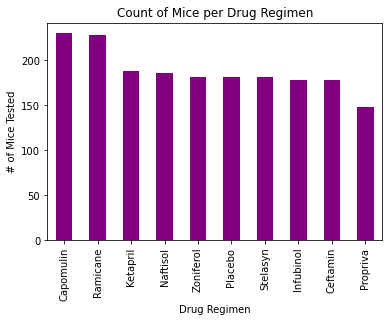

In [409]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mousy_plots = mousy_cleaned["Drug Regimen"].value_counts()
mousy_plots.plot(kind = "bar", color = "purple")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Tested")
plt.title("Count of Mice per Drug Regimen")
plt.show()

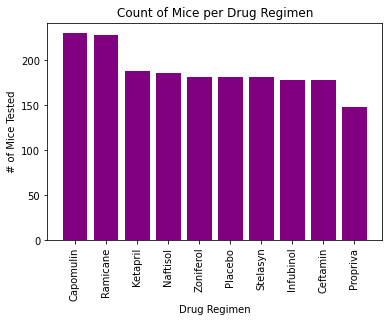

In [410]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mousy_plots))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, mousy_plots, color = "purple")
plt.xticks(tick_locations, mousy_plots.index.tolist(), rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Tested")
plt.title("Count of Mice per Drug Regimen")
plt.show()

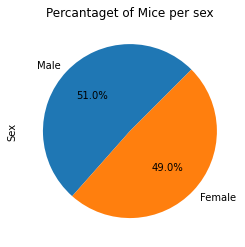

In [413]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mousy_sex = mousy_cleaned["Sex"].value_counts()
mousy_sex.plot(kind = "pie", autopct='%1.1f%%', startangle=45)
plt.title("Percantaget of Mice per sex")
plt.show()

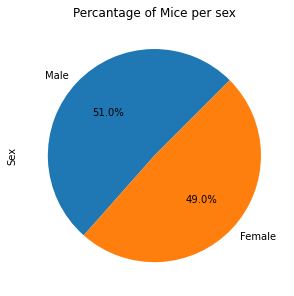

In [414]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']

fig, ax = plt.subplots()
ax.pie(mousy_sex, labels=labels, autopct='%.1f%%', startangle=45)
plt.tight_layout()
plt.ylabel("Sex")
plt.title("Percantage of Mice per sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [322]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_time = mousy_cleaned.groupby(["Mouse ID"])['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_merged = pd.merge(mouse_time, mousy_cleaned, how='left', on = ["Mouse ID", "Timepoint"])
mouse_merged
#mouse_four_treat = mouse_merged[mouse_merged["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [323]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_group = mouse_merged[mouse_merged["Drug Regimen"] == drug]
    quartiles = drug_group["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    
    # add subset
    tumor_vol_list.append(drug_group["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    iqr = quartiles[0.75]-quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)
    outliers = [lower_bound, upper_bound]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: [20.70456164999999, 51.83201549]
Ramicane's potential outliers: [17.912664470000003, 54.30681135]
Infubinol's potential outliers: [36.83290494999999, 82.74144559000001]
Ceftamin's potential outliers: [25.355449580000002, 87.66645829999999]


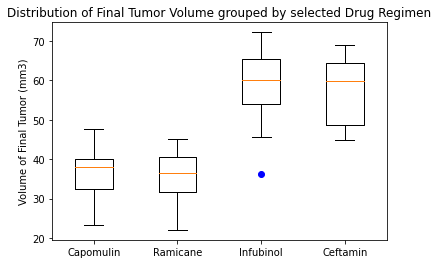

In [416]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_axis = np.arange(len(treatment_list))
tick_locations = [value + 1 for value in x_axis]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Volume of Final Tumor (mm3)')
ax1.boxplot(tumor_vol_list, sym='b')
plt.xticks(tick_locations, treatment_list)
plt.title("Distribution of Final Tumor Volume grouped by selected Drug Regimen")
plt.show()

## Line and Scatter Plots

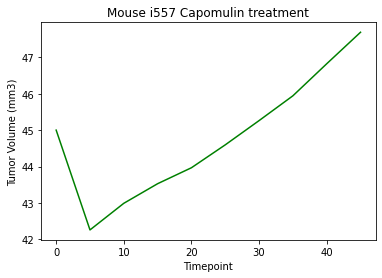

In [421]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = mousy_cleaned[(mousy_cleaned["Drug Regimen"] == "Capomulin") & (mousy_cleaned["Mouse ID"] == "i557")]

plt.plot(mouse_capomulin["Timepoint"], mouse_capomulin["Tumor Volume (mm3)"], color = "g")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse i557 Capomulin treatment")
plt.show()

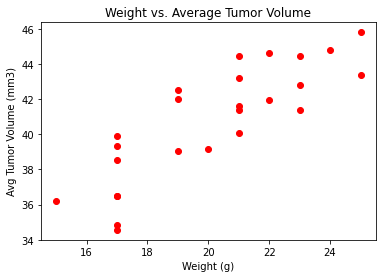

In [418]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_chunky = mousy_cleaned[mousy_cleaned["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()

plt.scatter(mouse_chunky["Weight (g)"], mouse_chunky["Tumor Volume (mm3)"], color = "r")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


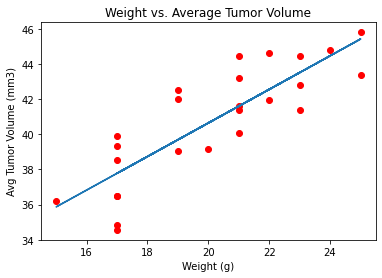

In [419]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = np.corrcoef(mouse_chunky["Weight (g)"], mouse_chunky["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0, 1], 2)}")

m, b = np.polyfit(mouse_chunky["Weight (g)"], mouse_chunky["Tumor Volume (mm3)"], 1)

plt.scatter(mouse_chunky["Weight (g)"], mouse_chunky["Tumor Volume (mm3)"], color = "r")
plt.plot(mouse_chunky["Weight (g)"], (m * mouse_chunky["Weight (g)"] + b))
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Weight vs. Average Tumor Volume")
plt.show()